In [26]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV




In [27]:
df = pd.read_csv("swmax.csv")


In [28]:
#df.columns

# Classification User

In [29]:
feature_cols_users = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count', 'cred','BotScore',
       'normalize_influence']

In [30]:
zalogskal = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count', 'mentions', 'quotes']

In [31]:
for col in zalogskal:
    df[f'{col}'] = np.log1p(df[col])

# Classification - Tweet Feature

In [32]:
feature_cols_tweet = [
        'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
        'Determiners', 'Prepositions', 'Digits'
]

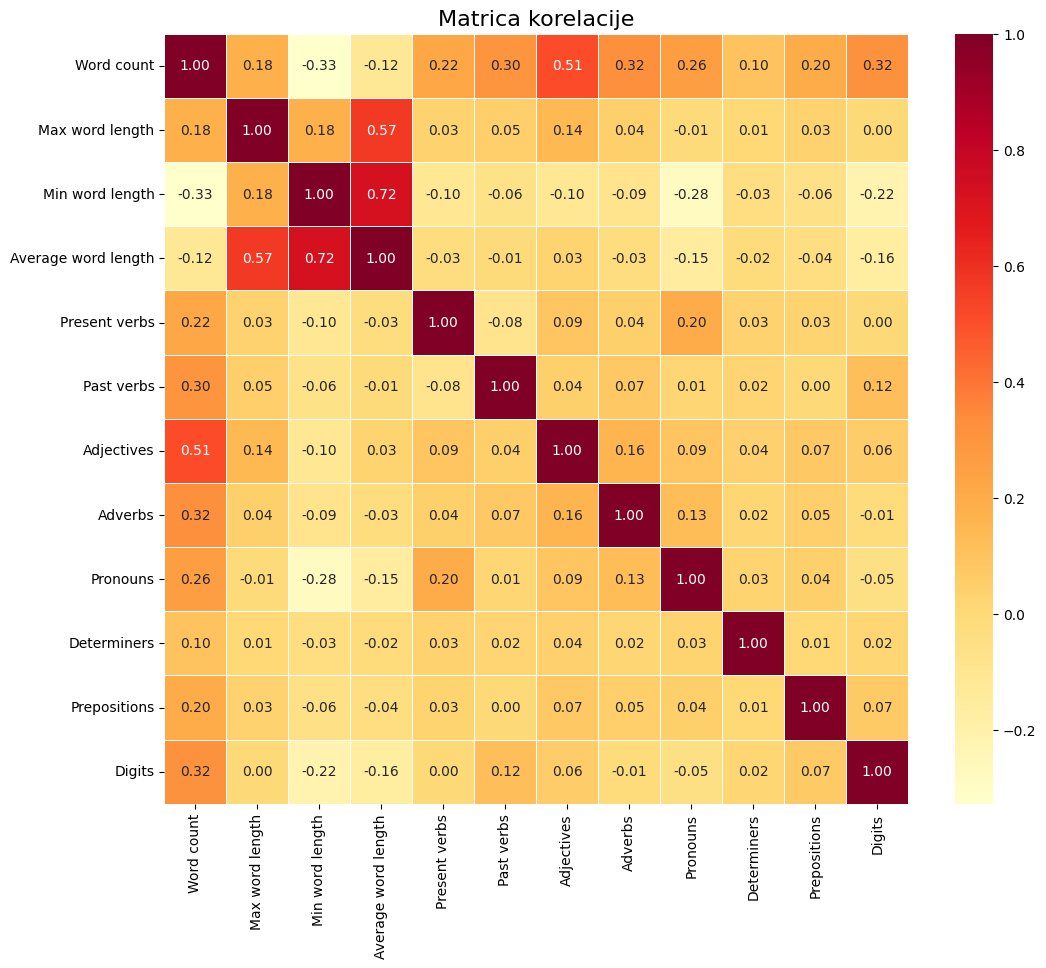

In [33]:
correlation_matrix = df[feature_cols_tweet].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

In [34]:
#for col in feature_cols_tweet:
 #   df[f'{col}'] = np.log1p(df[col])

In [35]:
x = df[feature_cols_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [36]:

model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_


In [37]:

feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
3   Average word length    0.286753
0            Word count    0.174170
1       Max word length    0.115595
6            Adjectives    0.090729
7               Adverbs    0.068454
2       Min word length    0.051834
5            Past verbs    0.049120
4         Present verbs    0.048268
11               Digits    0.044060
8              Pronouns    0.034702
10         Prepositions    0.022405
9           Determiners    0.013908


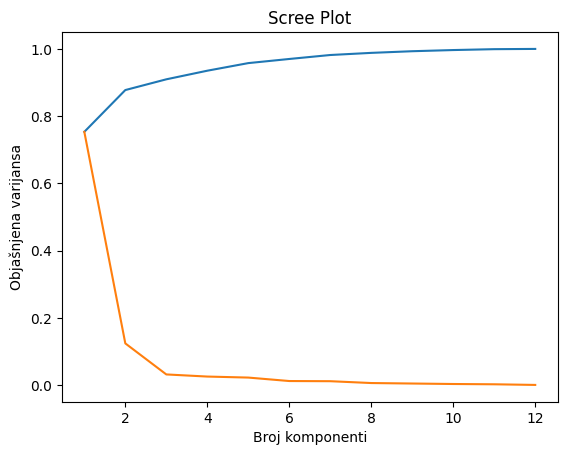

Broj komponenti za 95% varijanse: 5


In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()
pca.fit(x_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Broj komponenti')
plt.ylabel('Kumulativni procenat varijanse')
plt.title('PCA - Kumulativna varijansa')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Broj komponenti')
plt.ylabel('Objašnjena varijansa')
plt.title('Scree Plot')
plt.show()

plt.show()

# Pronađi broj komponenti koje objašnjavaju 95% varijanse
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Broj komponenti za 95% varijanse: {n_components_95}")


In [39]:
'''from sklearn.decomposition import PCA

pca = PCA(n_components=7)
x_pca = pca.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1) 


print(f"Procenat objašnjene varijanse sa 5 komponenti: {sum(pca.explained_variance_ratio_):.4f}")'''


'from sklearn.decomposition import PCA\n\npca = PCA(n_components=7)\nx_pca = pca.fit_transform(x)\n\nx_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1) \n\n\nprint(f"Procenat objašnjene varijanse sa 5 komponenti: {sum(pca.explained_variance_ratio_):.4f}")'

In [40]:
'''from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline


k = 5
selector = SelectKBest(score_func=f_classif, k=k)


x_train_selected = selector.fit_transform(x_train, y_train)

x_test_selected = selector.transform(x_test)

selected_features_mask = selector.get_support()
selected_feature_names = [col for col, selected in zip(x_train.columns, selected_features_mask) if selected]

print("Odabrani atributi:", selected_feature_names)'''


'from sklearn.feature_selection import SelectKBest, f_classif\nfrom sklearn.pipeline import Pipeline\n\n\nk = 5\nselector = SelectKBest(score_func=f_classif, k=k)\n\n\nx_train_selected = selector.fit_transform(x_train, y_train)\n\nx_test_selected = selector.transform(x_test)\n\nselected_features_mask = selector.get_support()\nselected_feature_names = [col for col, selected in zip(x_train.columns, selected_features_mask) if selected]\n\nprint("Odabrani atributi:", selected_feature_names)'

In [41]:
# Random Forest - Tweet


rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.6433920786914564
Precision: 0.6595554229449501
Recall: 0.638457650371868
F1: 0.6488350761328197
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64     12990
         1.0       0.66      0.64      0.65     13849

    accuracy                           0.64     26839
   macro avg       0.64      0.64      0.64     26839
weighted avg       0.64      0.64      0.64     26839

------------------------------
Confusion matrix:
[[8426 4564]
 [5007 8842]]


In [42]:
# Decision Tree - Tweet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.6090763441260851
Precision: 0.6351993556182037
Recall: 0.569427395479818
F1: 0.6005178190679257
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62     12990
         1.0       0.64      0.57      0.60     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.61      0.61      0.61     26839

------------------------------
Confusion matrix:
[[8461 4529]
 [5963 7886]]


In [44]:
len(df[df['BinaryNumTarget']==0.0])

65267

In [45]:
len(df[df['BinaryNumTarget']==1.0])

68928

In [46]:
# Naive Bayes -  Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': True}
Accuracy: 0.5762882372666642
Precision: 0.5917339456336568
Recall: 0.5768647555780201
F1: 0.5842047531992688
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57     12990
         1.0       0.59      0.58      0.58     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[7478 5512]
 [5860 7989]]


In [47]:
# Logistic Regression - Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.578486530794739
Precision: 0.5841295116772823
Recall: 0.6357137699472886
F1: 0.6088309532865392
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54     12990
         1.0       0.58      0.64      0.61     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[6722 6268]
 [5045 8804]]


In [48]:
#KNeighbors - Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.6164909273817951
Precision: 0.6327658303464755
Recall: 0.6118853346812044
F1: 0.622150435006057
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61     12990
         1.0       0.63      0.61      0.62     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8072 4918]
 [5375 8474]]


In [49]:
#XGBoost - Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6328477215991654
Precision: 0.6506751150335671
Recall: 0.6228608563795219
F1: 0.636464251457242
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63     12990
         1.0       0.65      0.62      0.64     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8359 4631]
 [5223 8626]]


In [50]:
# SVM - Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.5929058459704162
Precision: 0.6056073415709228
Recall: 0.6051700483789443
F1: 0.6053886160069344
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58     12990
         1.0       0.61      0.61      0.61     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.59     26839
weighted avg       0.59      0.59      0.59     26839

------------------------------
Confusion matrix:
[[7532 5458]
 [5468 8381]]


In [51]:
random_predictions = np.random.randint(0, 2, size=len(y_test)) 


print("=== Random Baseline Model ===")
print("Accuracy:", metrics.accuracy_score(y_test, random_predictions))
print("Precision:", metrics.precision_score(y_test, random_predictions, zero_division=1))
print("Recall:", metrics.recall_score(y_test, random_predictions, zero_division=1))
print("f1:", metrics.f1_score(y_test, random_predictions, zero_division=1))
print(classification_report(y_test, random_predictions))

=== Random Baseline Model ===
Accuracy: 0.5006147770036141
Precision: 0.5165014059493859
Recall: 0.5040075095674778
f1: 0.51017797756094
              precision    recall  f1-score   support

         0.0       0.48      0.50      0.49     12990
         1.0       0.52      0.50      0.51     13849

    accuracy                           0.50     26839
   macro avg       0.50      0.50      0.50     26839
weighted avg       0.50      0.50      0.50     26839



# Empath

In [52]:
df_empath = pd.read_csv("df_empath_final.csv")

In [53]:
df.shape

(134195, 232)

In [54]:
df_empath.shape

(134198, 196)

In [55]:
'''# Definicija emocija
positive_emotions = [
    'empath_result.joy', 'empath_result.cheerfulness', 'empath_result.fun', 'empath_result.optimism', 
    'empath_result.love', 'empath_result.affection', 'empath_result.celebration', 'empath_result.positive_emotion'
]

negative_emotions = [
    'empath_result.disgust', 'empath_result.sadness', 'empath_result.hate',
    'empath_result.neglect', 'empath_result.negative_emotion', 
]

fear_emotions = [
    'empath_result.suffering', 'empath_result.fear', 'empath_result.nervousness', 'empath_result.shame', 'empath_result.pain'
]

aggresion_emotion = [
    'empath_result.swearing_terms', 'empath_result.aggression', 'empath_result.crime','empath_result.violence'
]

moral_emotions = [
    'empath_result.politeness', 'empath_result.confusion', 'empath_result.envy',
    'empath_result.trust', 'empath_result.power','empath_result.pride', 'empath_result.sympathy', 'empath_result.deception'
]




df_empath['positive_emotions'] = df_empath[positive_emotions].sum(axis=1)
df_empath['negative_emotions'] = df_empath[negative_emotions].sum(axis=1)
df_empath['fear_emotions'] = df_empath[fear_emotions].sum(axis=1)
df_empath['aggression_emotions'] = df_empath[aggresion_emotion].sum(axis=1)
df_empath['moral_emotions'] = df_empath[moral_emotions].sum(axis=1)

print(df_empath[['positive_emotions', 'negative_emotions', 'fear_emotions', 'aggression_emotions', 'moral_emotions']].head(10))
'''

"# Definicija emocija\npositive_emotions = [\n    'empath_result.joy', 'empath_result.cheerfulness', 'empath_result.fun', 'empath_result.optimism', \n    'empath_result.love', 'empath_result.affection', 'empath_result.celebration', 'empath_result.positive_emotion'\n]\n\nnegative_emotions = [\n    'empath_result.disgust', 'empath_result.sadness', 'empath_result.hate',\n    'empath_result.neglect', 'empath_result.negative_emotion', \n]\n\nfear_emotions = [\n    'empath_result.suffering', 'empath_result.fear', 'empath_result.nervousness', 'empath_result.shame', 'empath_result.pain'\n]\n\naggresion_emotion = [\n    'empath_result.swearing_terms', 'empath_result.aggression', 'empath_result.crime','empath_result.violence'\n]\n\nmoral_emotions = [\n    'empath_result.politeness', 'empath_result.confusion', 'empath_result.envy',\n    'empath_result.trust', 'empath_result.power','empath_result.pride', 'empath_result.sympathy', 'empath_result.deception'\n]\n\n\n\n\ndf_empath['positive_emotions']

In [56]:
# Grupa 1: Pozitivne emocije
positive_emotions = [
    'cheerfulness', 'joy', 'contentment', 'love', 'warmth',
    'positive_emotion', 'fun', 'giving', 'friends'
]

# Grupa 2: Negativne emocije
negative_emotions = [
    'sadness', 'disgust', 'suffering', 'negative_emotion',
    'weakness', 'neglect'
]

# Grupa 3: Socijalne emocije
social_emotions = [
    'pride', 'shame', 'politeness', 'affection', 'leader',
    'dominant_personality', 'childish', 'trust', 'sympathy'
]

# Grupa 4: Intenzivne emocije
intense_emotions = [
    'surprise', 'rage', 'horror', 'fear', 'exasperation',
    'nervousness', 'irritability', 'torment', 'pain', 'hate', 'anger'
]

# Grupa 5: Kognitivno-emotivne emocije
cognitive_emotions = [
    'anticipation', 'confusion', 'envy', 'disappointment',
    'optimism', 'zest', 'achievement'
]

# Kreiranje novih kolona kao zbir postojećih
df_empath['emotion_positive'] = df_empath[[f'empath_result.{x}' for x in positive_emotions]].sum(axis=1)
df_empath['emotion_negative'] = df_empath[[f'empath_result.{x}' for x in negative_emotions]].sum(axis=1)
df_empath['emotion_social']   = df_empath[[f'empath_result.{x}' for x in social_emotions]].sum(axis=1)
df_empath['emotion_intense']  = df_empath[[f'empath_result.{x}' for x in intense_emotions]].sum(axis=1)
df_empath['emotion_cognitive'] = df_empath[[f'empath_result.{x}' for x in cognitive_emotions]].sum(axis=1)


In [57]:
df_empath.columns

Index(['Unnamed: 0', 'tweet_new', 'empath_result.help', 'empath_result.office',
       'empath_result.dance', 'empath_result.money', 'empath_result.wedding',
       'empath_result.domestic_work', 'empath_result.sleep',
       'empath_result.medical_emergency',
       ...
       'empath_result.contentment', 'empath_result.writing',
       'empath_result.rural', 'empath_result.positive_emotion',
       'empath_result.musical', 'emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive'],
      dtype='object', length=201)

In [58]:
df_empath.columns

Index(['Unnamed: 0', 'tweet_new', 'empath_result.help', 'empath_result.office',
       'empath_result.dance', 'empath_result.money', 'empath_result.wedding',
       'empath_result.domestic_work', 'empath_result.sleep',
       'empath_result.medical_emergency',
       ...
       'empath_result.contentment', 'empath_result.writing',
       'empath_result.rural', 'empath_result.positive_emotion',
       'empath_result.musical', 'emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive'],
      dtype='object', length=201)

In [59]:
df_merged = pd.merge(df, df_empath, on='Unnamed: 0', how='left')

In [60]:
df_merged.shape

(134195, 432)

In [ ]:
print(df['tweet'].duplicated().sum())  # broj duplikata u df1



0


In [ ]:
df_merged.to_csv("merged.csv")

In [62]:
kolone = ['emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive']

In [63]:
x = df_merged[kolone]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [64]:
# Random Forest - Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.5680166921271285
Precision: 0.5763526782691135
Recall: 0.6145570077261896
F1: 0.5948420464076042
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.52      0.54     12990
         1.0       0.58      0.61      0.59     13849

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.57      0.57      0.57     26839

------------------------------
Confusion matrix:
[[6734 6256]
 [5338 8511]]


In [65]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

for importance, name in sorted(zip(importances, x_train.columns), reverse=True):
    print(f"{name}: {importance:.4f}")


emotion_social: 0.2411
emotion_negative: 0.2340
emotion_positive: 0.2012
emotion_intense: 0.1641
emotion_cognitive: 0.1597


In [66]:
# Decision Tree - Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.5634338090092775
Precision: 0.5652386780905753
Recall: 0.6669073579319806
F1: 0.6118784987909504
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.45      0.50     12990
         1.0       0.57      0.67      0.61     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.56      0.56      0.56     26839

------------------------------
Confusion matrix:
[[5886 7104]
 [4613 9236]]


In [ ]:
df_merged['tweet_new_x']

0         biden blunders 6 month update inflation delta ...
1         not as many people are literally starving out ...
2         supreme court is siding super rich property ow...
3         biden blunders broken campaign promises inflat...
4         i agree confluence events right now is unprece...
                                ...                        
134193    joe bidens family owned african slaves joe bid...
134194    joe bidens great great grandfather was slave o...
134195    joe bidens greatgrandfather joseph j biden 182...
134196    facts are bidens vp kamala harris great great ...
134197    yes representation matters did you know that b...
Name: tweet_new_x, Length: 134198, dtype: object

In [ ]:
df_merged.to_csv("merged.csv")

In [ ]:
len(df_merged[df_merged['BinaryNumTarget']==1.0])

68930

In [67]:
# Naive Bayes -  Empath

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5530384887663474
Precision: 0.565380001411333
Recall: 0.5785255253086865
F1: 0.5718772305496074
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.53      0.53     12990
         1.0       0.57      0.58      0.57     13849

    accuracy                           0.55     26839
   macro avg       0.55      0.55      0.55     26839
weighted avg       0.55      0.55      0.55     26839

------------------------------
Confusion matrix:
[[6831 6159]
 [5837 8012]]


In [68]:
# Logistic Regression - Empath

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)

lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=grid_search.best_params_['C'])

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best hyperparameters from GridSearchCV: {'C': 10}
Accuracy: 0.5520697492455009
Precision: 0.5599842405936043
Recall: 0.6157845331792909
F1: 0.5865602861269689
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.48      0.51     12990
         1.0       0.56      0.62      0.59     13849

    accuracy                           0.55     26839
   macro avg       0.55      0.55      0.55     26839
weighted avg       0.55      0.55      0.55     26839

------------------------------
Confusion matrix:
[[6289 6701]
 [5321 8528]]


In [69]:
#KNeighbors - Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy: 0.5524796005812437
Precision: 0.5615539182853315
Recall: 0.6053866705177269
F1: 0.5826470690433997
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.50      0.52     12990
         1.0       0.56      0.61      0.58     13849

    accuracy                           0.55     26839
   macro avg       0.55      0.55      0.55     26839
weighted avg       0.55      0.55      0.55     26839

------------------------------
Confusion matrix:
[[6444 6546]
 [5465 8384]]


In [70]:
#XGBoost - Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.5704012817169045
Precision: 0.5737642343660538
Recall: 0.6512383565600405
F1: 0.6100514069264069
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52     12990
         1.0       0.57      0.65      0.61     13849

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.57      0.57      0.57     26839

------------------------------
Confusion matrix:
[[6290 6700]
 [4830 9019]]


In [71]:
# SVM - Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.5620552181526882
Precision: 0.5781424841477061
Recall: 0.5596071918550076
F1: 0.5687238570485066
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.56      0.56     12990
         1.0       0.58      0.56      0.57     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.56      0.56      0.56     26839

------------------------------
Confusion matrix:
[[7335 5655]
 [6099 7750]]


# User + Tweet

In [72]:
features_cols_user_tweet = feature_cols_tweet+feature_cols_users

In [73]:
x = df[features_cols_user_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [74]:
# Random Forest - User and Tweet
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.6689518983568687
Precision: 0.6825805502427541
Recall: 0.670012275254531
F1: 0.6762380206245673
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66     12990
         1.0       0.68      0.67      0.68     13849

    accuracy                           0.67     26839
   macro avg       0.67      0.67      0.67     26839
weighted avg       0.67      0.67      0.67     26839

------------------------------
Confusion matrix:
[[8675 4315]
 [4570 9279]]


In [75]:
# Decision Tree - User and Tweet

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6190990722456128
Precision: 0.6600459039548022
Recall: 0.5398945772257925
F1: 0.5939548000158875
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64     12990
         1.0       0.66      0.54      0.59     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.63      0.62      0.62     26839

------------------------------
Confusion matrix:
[[9139 3851]
 [6372 7477]]


In [76]:
# Naive Bayes -  User and Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 1.0, 'fit_prior': False}
Accuracy: 0.576847125451768
Precision: 0.6019139538688042
Recall: 0.5313741064336776
F1: 0.5644487056567593
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.63      0.59     12990
         1.0       0.60      0.53      0.56     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[8123 4867]
 [6490 7359]]


In [77]:
# Logistic Regression - User and Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6034874622750475
Precision: 0.6201573623079805
Recall: 0.5975882735215539
F1: 0.6086636758108406
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60     12990
         1.0       0.62      0.60      0.61     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839

------------------------------
Confusion matrix:
[[7921 5069]
 [5573 8276]]


In [78]:
#KNeighbors - User and Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
   # 'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5}
Accuracy: 0.6202913670405008
Precision: 0.6389184262494304
Recall: 0.6074084771463644
F1: 0.6227651304830649
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.63      0.62     12990
         1.0       0.64      0.61      0.62     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8236 4754]
 [5437 8412]]


In [79]:
#XGBoost - User and Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6660456797943292
Precision: 0.6849076597033
Recall: 0.6534045779478663
F1: 0.6687853368316027
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.66     12990
         1.0       0.68      0.65      0.67     13849

    accuracy                           0.67     26839
   macro avg       0.67      0.67      0.67     26839
weighted avg       0.67      0.67      0.67     26839

------------------------------
Confusion matrix:
[[8827 4163]
 [4800 9049]]


In [80]:
# SVM - User and Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.6190618130332725
Precision: 0.6533288215886981
Recall: 0.5576575926059644
F1: 0.6017140631086871
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63     12990
         1.0       0.65      0.56      0.60     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8892 4098]
 [6126 7723]]


# User + Empath

In [81]:
features_cols_user_empath = feature_cols_users + kolone
for col in zalogskal:
    df_merged[f'{col}'] = np.log1p(df_merged[col])

In [82]:
features_cols_user_empath

['followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [83]:
x = df_merged[features_cols_user_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [84]:
# Random Forest - User and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.6497634040016395
Precision: 0.6639398629228388
Recall: 0.6505162827640985
F1: 0.6571595302356117
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.64     12990
         1.0       0.66      0.65      0.66     13849

    accuracy                           0.65     26839
   macro avg       0.65      0.65      0.65     26839
weighted avg       0.65      0.65      0.65     26839

------------------------------
Confusion matrix:
[[8430 4560]
 [4840 9009]]


In [85]:
#Decision Tree - User and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.5905585155929803
Precision: 0.6367112810707457
Recall: 0.48090114809733553
F1: 0.547945205479452
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.71      0.63     12990
         1.0       0.64      0.48      0.55     13849

    accuracy                           0.59     26839
   macro avg       0.60      0.59      0.59     26839
weighted avg       0.60      0.59      0.59     26839

------------------------------
Confusion matrix:
[[9190 3800]
 [7189 6660]]


In [86]:
# Naive Bayes -  User and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.5, 'fit_prior': False}
Accuracy: 0.5638064011326801
Precision: 0.5819183111519045
Recall: 0.5493537439526319
F1: 0.5651673290495116
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.58      0.56     12990
         1.0       0.58      0.55      0.57     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.56      0.56      0.56     26839

------------------------------
Confusion matrix:
[[7524 5466]
 [6241 7608]]


In [87]:
# Logistic Regression - User and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.5741644621632699
Precision: 0.5925642594859241
Recall: 0.5593183623366308
F1: 0.5754615356041752
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.59      0.57     12990
         1.0       0.59      0.56      0.58     13849

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.58      0.57      0.57     26839

------------------------------
Confusion matrix:
[[7664 5326]
 [6103 7746]]


In [88]:
#KNeighbors - User and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6352323111889414
Precision: 0.643600084907663
Recall: 0.6567983247887934
F1: 0.6501322278607676
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.61      0.62     12990
         1.0       0.64      0.66      0.65     13849

    accuracy                           0.64     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.64      0.64      0.64     26839

------------------------------
Confusion matrix:
[[7953 5037]
 [4753 9096]]


In [89]:
#XGBoost - User and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.6316926860166177
Precision: 0.6535481871707468
Recall: 0.609141454256625
F1: 0.6305639645700191
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63     12990
         1.0       0.65      0.61      0.63     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8518 4472]
 [5413 8436]]


In [90]:
# SVM - User and Empath

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'] 
}

svm = SVC()
grid = GridSearchCV(svm, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='f1') 
grid.fit(x_train, y_train)

best_svm = grid.best_estimator_
y_pred = best_svm.predict(x_test)

print("Najbolji parametri:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 2 folds for each of 6 candidates, totalling 12 fits
Najbolji parametri: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.5683147658258504
Precision: 0.5861832584355244
Recall: 0.5557079933569211
F1: 0.5705389576692119
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.58      0.57     12990
         1.0       0.59      0.56      0.57     13849

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.57      0.57      0.57     26839

------------------------------
Confusion matrix:
[[7557 5433]
 [6153 7696]]


# Tweet + Empath

In [91]:
features_cols_tweet_empath = feature_cols_tweet + kolone

In [114]:
x = df_merged[features_cols_tweet_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [93]:
# Random Forest - Tweet and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6625060546220053
Precision: 0.6799098760796095
Recall: 0.653693407466243
F1: 0.6665439552348696
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66     12990
         1.0       0.68      0.65      0.67     13849

    accuracy                           0.66     26839
   macro avg       0.66      0.66      0.66     26839
weighted avg       0.66      0.66      0.66     26839

------------------------------
Confusion matrix:
[[8728 4262]
 [4796 9053]]


In [94]:
#Decision Tree - Tweet and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6145907075524424
Precision: 0.6368819807857533
Recall: 0.5887789732110622
F1: 0.6118865375956776
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.64      0.62     12990
         1.0       0.64      0.59      0.61     13849

    accuracy                           0.61     26839
   macro avg       0.62      0.62      0.61     26839
weighted avg       0.62      0.61      0.61     26839

------------------------------
Confusion matrix:
[[8341 4649]
 [5695 8154]]


In [96]:
# Naive Bayes -  Tweet and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 2.0, 'fit_prior': True}
Accuracy: 0.5767353478147472
Precision: 0.5919875822307635
Recall: 0.5783089031699039
F1: 0.585068303017021
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57     12990
         1.0       0.59      0.58      0.59     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[7470 5520]
 [5840 8009]]


In [97]:
# Logistic Regression -Tweet and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Accuracy: 0.5863109653861918
Precision: 0.5929209528965891
Recall: 0.6326088526247382
F1: 0.612122270742358
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.54      0.56     12990
         1.0       0.59      0.63      0.61     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.58      0.58     26839
weighted avg       0.59      0.59      0.59     26839

------------------------------
Confusion matrix:
[[6975 6015]
 [5088 8761]]


In [98]:
#KNeighbors - Tweet and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6090763441260851
Precision: 0.6244716351501669
Recall: 0.6080583435627122
F1: 0.6161557035194264
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60     12990
         1.0       0.62      0.61      0.62     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.61      0.61      0.61     26839

------------------------------
Confusion matrix:
[[7926 5064]
 [5428 8421]]


In [99]:
#XGBoost - Tweet and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6506203658854652
Precision: 0.6624291733255848
Recall: 0.6584590945194599
F1: 0.6604381676625023
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64     12990
         1.0       0.66      0.66      0.66     13849

    accuracy                           0.65     26839
   macro avg       0.65      0.65      0.65     26839
weighted avg       0.65      0.65      0.65     26839

------------------------------
Confusion matrix:
[[8343 4647]
 [4730 9119]]


In [116]:
# SVM - Tweet and Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5942471776146653
Precision: 0.6062477558348295
Recall: 0.6095746985341902
F1: 0.6079066753078418
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58     12990
         1.0       0.61      0.61      0.61     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.59     26839
weighted avg       0.59      0.59      0.59     26839

------------------------------
Confusion matrix:
[[7507 5483]
 [5407 8442]]


# User + Tweet + Empath 

In [117]:
features_full = feature_cols_tweet+feature_cols_users+kolone

In [101]:
features_full

['Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Determiners',
 'Prepositions',
 'Digits',
 'followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [102]:
df_merged['followers_count'].max()

2.9799922685578646

In [ ]:
#for col in zalogskal:
 #   df_merged[f'{col}'] = np.log1p(df_merged[col])

In [ ]:
df_merged['followers_count'].max()

18.687664430135662

In [118]:
x = df_merged[features_full]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [104]:
# Random Forest - Full
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6788255896270353
Precision: 0.6988666615958014
Recall: 0.6634414037114593
F1: 0.6806934360646022
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68     12990
         1.0       0.70      0.66      0.68     13849

    accuracy                           0.68     26839
   macro avg       0.68      0.68      0.68     26839
weighted avg       0.68      0.68      0.68     26839

------------------------------
Confusion matrix:
[[9031 3959]
 [4661 9188]]


In [105]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

for importance, name in sorted(zip(importances, x_train.columns), reverse=True):
    print(f"{name}: {importance:.4f}")


favourites_count: 0.0809
statuses_count: 0.0774
Average word length: 0.0741
cred: 0.0733
normalize_influence: 0.0716
friends_count: 0.0715
followers_count: 0.0677
listed_count: 0.0604
Word count: 0.0600
Max word length: 0.0426
Adjectives: 0.0344
emotion_social: 0.0344
emotion_positive: 0.0336
emotion_negative: 0.0289
Digits: 0.0275
emotion_cognitive: 0.0240
Adverbs: 0.0233
Min word length: 0.0226
Past verbs: 0.0218
emotion_intense: 0.0189
Present verbs: 0.0168
Pronouns: 0.0145
Prepositions: 0.0104
Determiners: 0.0055
BotScore: 0.0039


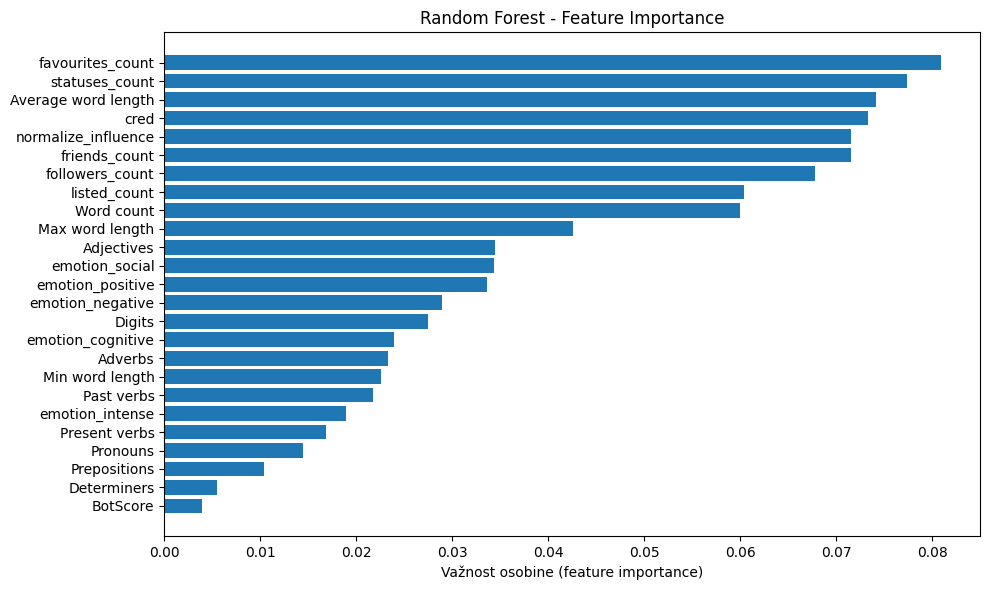

In [106]:

feature_names = x_train.columns

features_sorted = sorted(zip(importances, feature_names), reverse=True)
importances_sorted, names_sorted = zip(*features_sorted)

plt.figure(figsize=(10, 6))
plt.barh(names_sorted, importances_sorted)
plt.xlabel("Važnost osobine (feature importance)")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [107]:
#Decision Tree - Full

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6200678117664593
Precision: 0.6486970684039088
Recall: 0.5752039858473535
F1: 0.6097439626468675
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63     12990
         1.0       0.65      0.58      0.61     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8676 4314]
 [5883 7966]]


In [108]:
# Naive Bayes -  Full

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 2.0, 'fit_prior': False}
Accuracy: 0.5856402995640673
Precision: 0.6066624960900845
Recall: 0.5601848508917612
F1: 0.5824980290573263
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.57      0.61      0.59     12990
         1.0       0.61      0.56      0.58     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.59     26839
weighted avg       0.59      0.59      0.59     26839

------------------------------
Confusion matrix:
[[7960 5030]
 [6091 7758]]


In [109]:
# Logistic Regression - Full

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Accuracy: 0.6076604940571556
Precision: 0.6171384202724641
Recall: 0.6313091197920427
F1: 0.624143346659052
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59     12990
         1.0       0.62      0.63      0.62     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.61      0.61      0.61     26839

------------------------------
Confusion matrix:
[[7566 5424]
 [5106 8743]]


In [110]:
#KNeighbors - Full


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.626848988412385
Precision: 0.6463582226294091
Recall: 0.6113076756444509
F1: 0.6283445281478458
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63     12990
         1.0       0.65      0.61      0.63     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8358 4632]
 [5383 8466]]


In [111]:
#XGBoost - Full

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.6793844778121391
Precision: 0.6974694984184365
Recall: 0.6687125424218355
F1: 0.6827883658347772
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68     12990
         1.0       0.70      0.67      0.68     13849

    accuracy                           0.68     26839
   macro avg       0.68      0.68      0.68     26839
weighted avg       0.68      0.68      0.68     26839

------------------------------
Confusion matrix:
[[8973 4017]
 [4588 9261]]


In [119]:
# SVM - Full

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6144416707030813
Precision: 0.6442046297059065
Recall: 0.5646617084266012
F1: 0.6018162228720948
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63     12990
         1.0       0.64      0.56      0.60     13849

    accuracy                           0.61     26839
   macro avg       0.62      0.62      0.61     26839
weighted avg       0.62      0.61      0.61     26839

------------------------------
Confusion matrix:
[[8671 4319]
 [6029 7820]]


In [ ]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feature_names = x_train.columns

features_sorted = sorted(zip(importances, feature_names), reverse=True)
importances_sorted, names_sorted = zip(*features_sorted)

plt.figure(figsize=(10, 6))
plt.barh(names_sorted, importances_sorted)
plt.xlabel("Važnost osobine (feature importance)")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


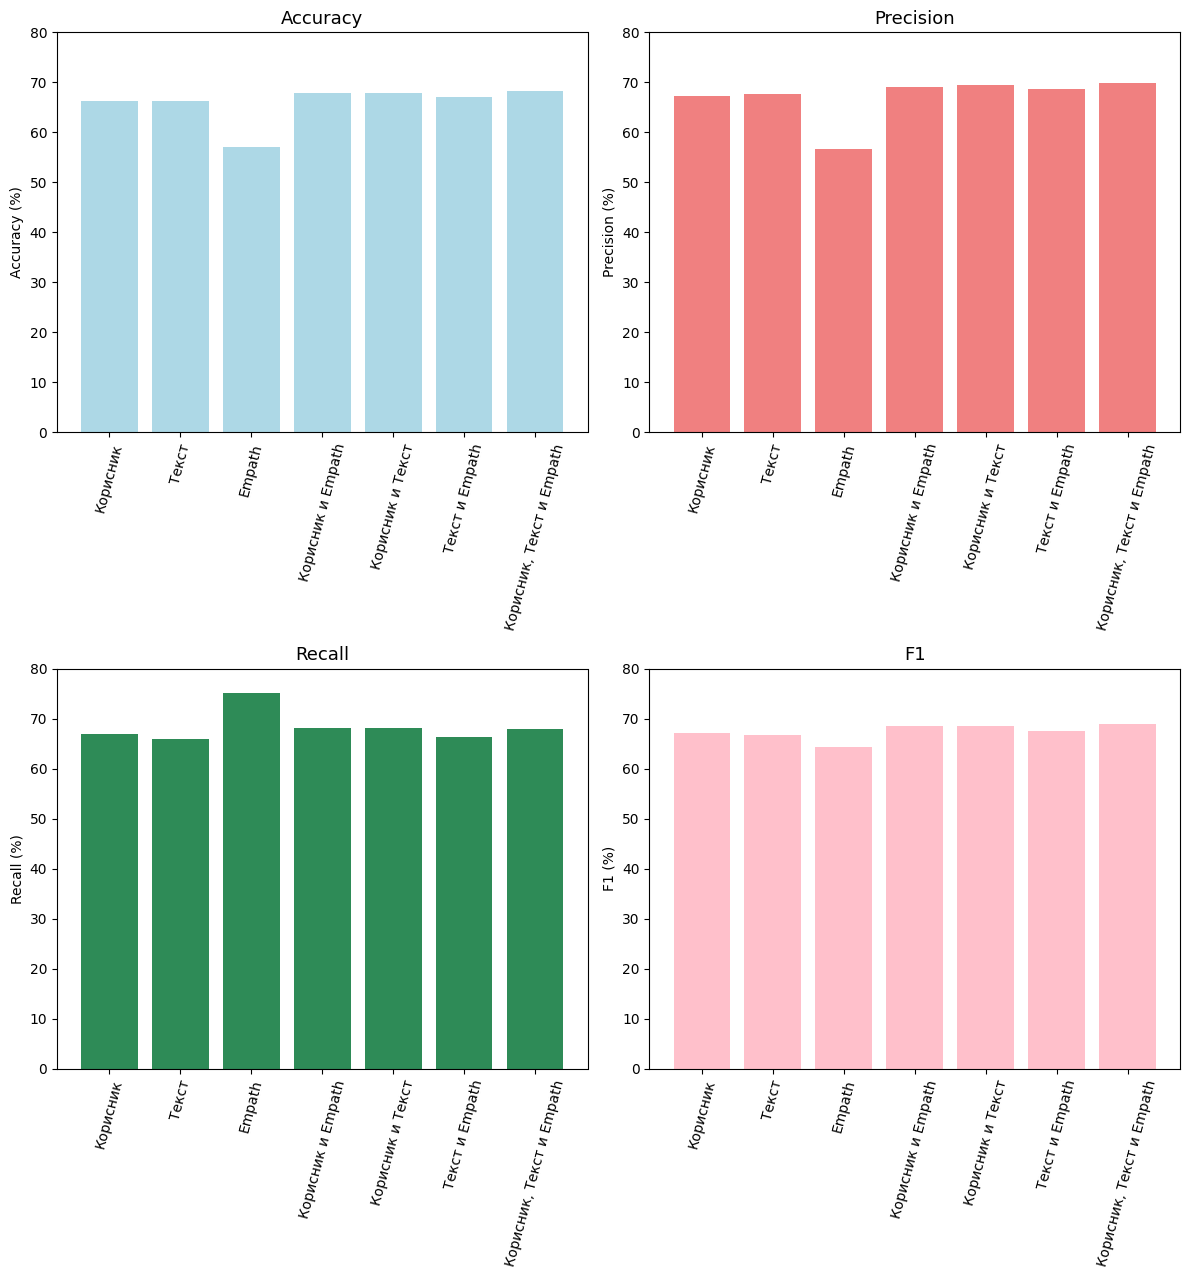

In [ ]:
import matplotlib.pyplot as plt

results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.566, 0.751, 0.643],
    "Корисник и Empath":    [0.678, 0.690, 0.681, 0.685],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.664, 0.675],
    "Корисник, Текст и Empath":    [0.683, 0.698, 0.680, 0.689]
}

metrics1 = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['lightblue', 'lightcoral', 'seagreen', 'pink']
fig, axes = plt.subplots(2, 2, figsize=(12, 14))

for i, ax in enumerate(axes.flat):
    values = [results[model][i] * 100 for model in results]
    ax.bar(results.keys(), values, color=colors[i])
    ax.set_ylim([0, 80])
    ax.set_ylabel(f"{metrics1[i]} (%)")
    #ax.set_xlabel("Атрибути")
    ax.tick_params(axis='x', labelrotation=75)

    ax.set_title(f"{metrics1[i]}", fontsize=13)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


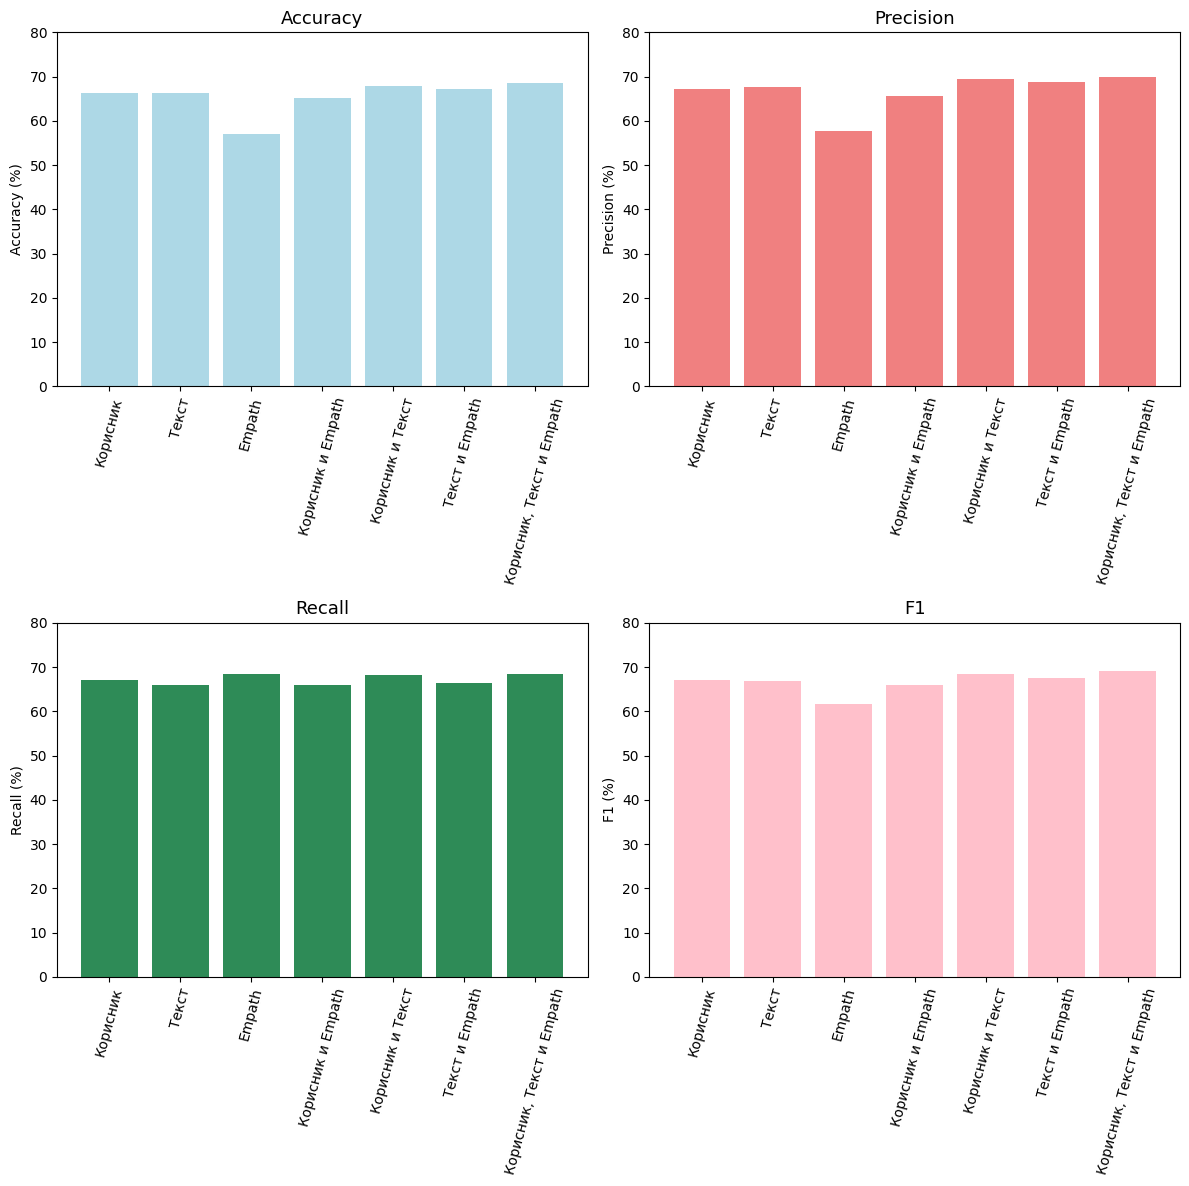

In [ ]:
# novi empath

results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.578, 0.684, 0.616],
    "Корисник и Empath":    [0.651, 0.655, 0.660, 0.660],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.665, 0.676],
    "Корисник, Текст и Empath":    [0.685, 0.700, 0.685, 0.692]
}

metrics1 = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['lightblue', 'lightcoral', 'seagreen', 'pink']
fig, axes = plt.subplots(2, 2, figsize=(12, 13))

for i, ax in enumerate(axes.flat):
    values = [results[model][i] * 100 for model in results]
    ax.bar(results.keys(), values, color=colors[i])
    ax.set_ylim([0, 80])
    ax.set_ylabel(f"{metrics1[i]} (%)")
    #ax.set_xlabel("Атрибути")
    ax.tick_params(axis='x', labelrotation=75)

    ax.set_title(f"{metrics1[i]}", fontsize=13)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


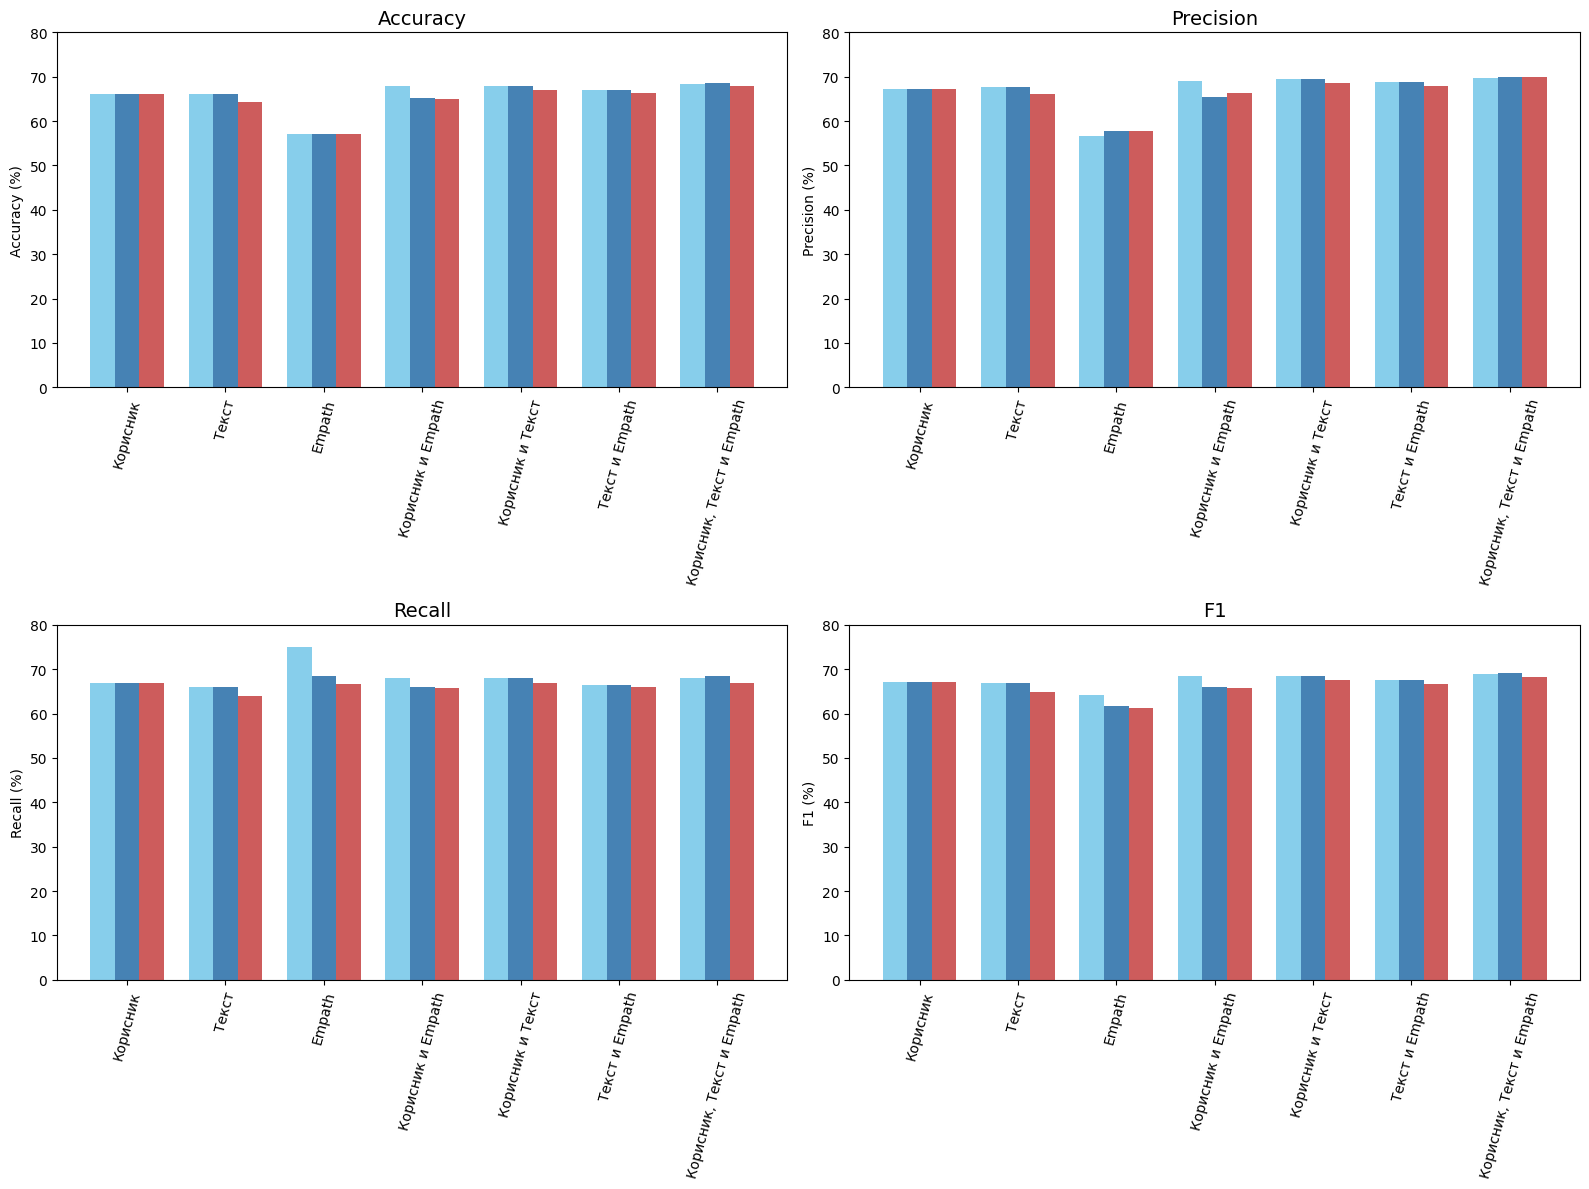

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Stari rezultati
old_results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.566, 0.751, 0.643],
    "Корисник и Empath":    [0.678, 0.690, 0.681, 0.685],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.664, 0.675],
    "Корисник, Текст и Empath":    [0.683, 0.698, 0.680, 0.689]
}

# Novi rezultati
new_results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.578, 0.684, 0.616],
    "Корисник и Empath":    [0.651, 0.655, 0.660, 0.660],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.665, 0.676],
    "Корисник, Текст и Empath":    [0.685, 0.700, 0.685, 0.692]
}

# Rezultati sa većim stopword setom
stopword_results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.643, 0.660, 0.639, 0.649],
    "Empath":     [0.570, 0.578, 0.667, 0.612],
    "Корисник и Empath":    [0.650, 0.664, 0.657, 0.657],
    "Корисник и Текст":    [0.669, 0.685, 0.670, 0.676],
    "Текст и Empath":     [0.663, 0.680, 0.659, 0.667],
    "Корисник, Текст и Empath":    [0.679, 0.700, 0.669, 0.683]
}

# Vizualizacija
metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['skyblue', 'steelblue', 'indianred']
labels = list(old_results.keys())
x = np.arange(len(labels))
width = 0.25

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, ax in enumerate(axes.flat):
    old_vals = [old_results[label][i] * 100 for label in labels]
    new_vals = [new_results[label][i] * 100 for label in labels]
    stopword_vals = [stopword_results[label][i] * 100 for label in labels]

    ax.bar(x - width, old_vals, width, label='Stari', color=colors[0])
    ax.bar(x, new_vals, width, label='Novi', color=colors[1])
    ax.bar(x + width, stopword_vals, width, label='Veći stopword', color=colors[2])

    ax.set_title(metrics[i], fontsize=14)
    ax.set_ylabel(f"{metrics[i]} (%)")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=75)
    ax.set_ylim([0, 80])
    #ax.legend()

plt.tight_layout()
plt.show()
